In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
plt.style.use('bmh')

In [ ]:
churn_df = pd.read_csv("churn_df.csv", index_col=0)
churn_df.head()

In [ ]:
X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values
print(X.shape, y.shape)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)

In [ ]:
X_new = np.array(
    [
        [56.8, 17.5],
        [24.4, 24.1],
        [50.1, 10.9],
    ]
)
print(X_new)

In [ ]:
predictions = knn.predict(X_new)
print("Prediction: {}".format(predictions))

In [ ]:
X = churn_df[["account_length", "customer_service_calls"]].values
y = churn_df["churn"].values
print(X.shape, y.shape)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)

In [ ]:
X_new = np.array([[30.0, 17.5], [107.0, 24.1], [213.0, 10.9]])
print(X_new.shape)

In [ ]:
y_pred = knn.predict(X_new)
print(f"Predictions: {y_pred}")

In [ ]:
X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

In [ ]:
# Ex3 Over/Underfitting
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:

    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)

    # Fit the model
    knn.fit(X_train, y_train)

    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, "\n", train_accuracies, "\n", test_accuracies)

# Add a title
plt.title("KNN: Varying Number of Neighbors")

my_train = list(train_accuracies.values())
my_test = list(test_accuracies.values())
# Plot training accuracies
plt.plot(neighbors, my_train, label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, my_test, label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

In [ ]:
diabetes_df = pd.read_csv('diabetes.csv', index_col = 0)
print(diabetes_df.shape)
print('--------------------------------------------------------------')
diabetes_df = diabetes_df[diabetes_df['bmi'] != 0]
print(diabetes_df.shape)
print('--------------------------------------------------------------')
diabetes_df = diabetes_df[diabetes_df['glucose'] != 0]
print(diabetes_df.shape)
diabetes_df.head()

In [ ]:
X = diabetes_df.drop('glucose', axis=1).values
y = diabetes_df['glucose'].values
print(type(X), type(y))

In [ ]:
X_bmi = X[:, 3]
print(y.shape, X_bmi.shape)

In [ ]:
X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi.shape)
plt.scatter(X_bmi, y, s=25, color='blue')
plt.ylabel('Blood Glucose (mg/dl)')
plt.xlabel('Body Mass Index')
#plt.grid(True)
plt.show()

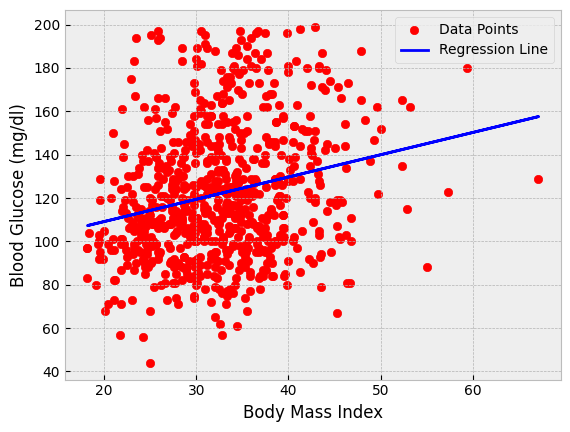

In [7]:
# Assuming X_bmi and y are already defined
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)

# Scatter plot with red points
plt.scatter(X_bmi, y, color='red', label='Data Points')

# Plot the regression line in blue
plt.plot(X_bmi, predictions, color='blue', label='Regression Line')

# Add labels and legend
plt.ylabel('Blood Glucose (mg/dl)')
plt.xlabel('Body Mass Index')
plt.legend()
plt.show()

In [ ]:
# Load the dataset
sales_df = pd.read_csv("sales_df.csv")

# Create X (features) from the "radio" column
X = sales_df["radio"].values  # Convert to NumPy array

# Create y (target) from the "sales" column
y = sales_df["sales"].values  # Convert to NumPy array

# Reshape X into a 2D array
X = X.reshape(-1, 1)  # Necessary for scikit-learn

# Print the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (4546, 1)
Shape of y: (4546,)


In [10]:
reg = LinearRegression()
reg.fit(X, y)
predictions = reg.predict(X)
print("First five prediction values:\n", predictions[:5])

First five prediction values:
 [ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


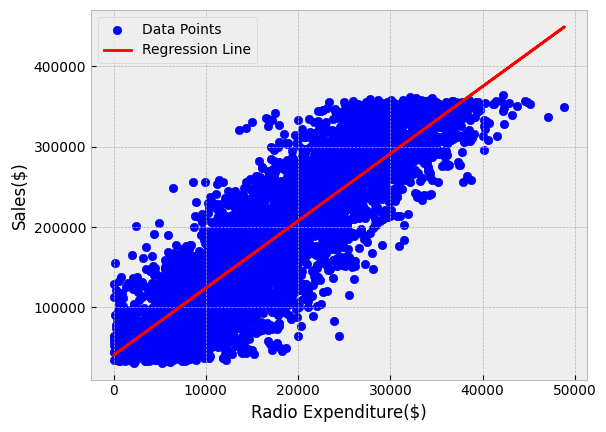

In [12]:
# Scatter plot
plt.scatter(X, y, color='blue', label='Data Points')

# Plot the regression line
plt.plot(X, predictions, color='red', label='Regression Line')

# Add labels and legend
plt.ylabel('Sales($)')
plt.xlabel('Radio Expenditure($)')
plt.legend()
plt.show()